## 0

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

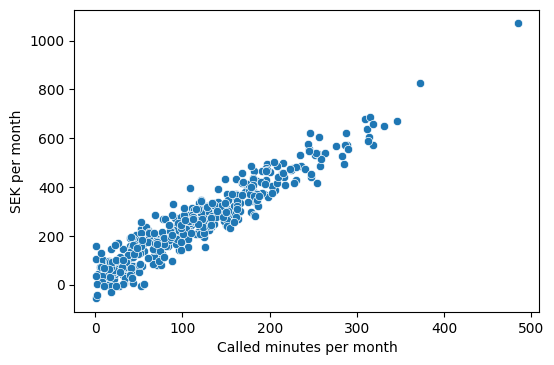

In [172]:
np.random.seed(42)
phone_sub_x = np.abs(np.random.normal(100, 100, 400))
phone_sub_error = np.random.normal(0, 50, 400)
phone_sub_y = 2 * phone_sub_x + 25 + phone_sub_error

ground_truth = 2 * phone_sub_x + 25

fig, ax = plt.subplots(dpi=100)
sns.scatterplot(x = phone_sub_x, y = phone_sub_y)
ax.set(xlabel = "Called minutes per month", ylabel = "SEK per month")
plt.show()

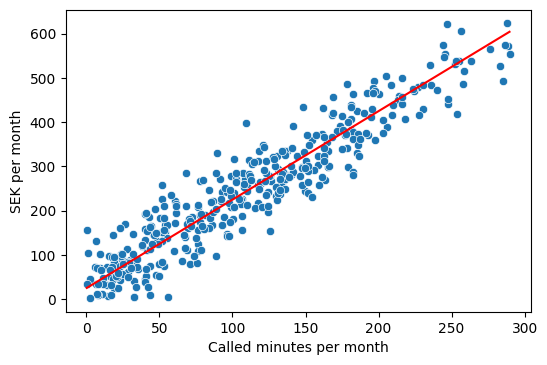

In [179]:
phone_sub_df = pd.DataFrame((phone_sub_x, phone_sub_y)).T
phone_sub_df.columns = ["x", "y"]

# removes all x values over 300
phone_sub_df = phone_sub_df[phone_sub_df["x"] < 300]

# removes all negative y values
phone_sub_df = phone_sub_df[phone_sub_df["y"] > 0]

fig, ax = plt.subplots(dpi=100)
sns.scatterplot(x = phone_sub_df["x"], y = phone_sub_df["y"])
sns.lineplot(x = phone_sub_df["x"], y = 2 * phone_sub_df["x"] + 25, color = "red")
ax.set(xlabel = "Called minutes per month", ylabel = "SEK per month")
plt.show()

In [180]:
phone_sub_df.head()

,x,y
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1

In [272]:
def train_test_split(df, train_fraction = 0.7, random_state = 42, replace = False):
    train_x = df["x"].sample(n = int(len(df)*train_fraction), random_state = random_state, replace = replace)
    test_x = df["x"].drop(train_x.index)
    train_y = df["y"][train_x.index]
    test_y = df["y"].drop(train_y.index)
    
    train_x = pd.DataFrame(train_x, columns=["x"])
    train_x.insert(0, "interrcept", 1)

    test_x = pd.DataFrame(test_x, columns=["x"])
    test_x.insert(0, "interrcept", 1)

    return (train_x, test_x, train_y, test_y)


## 2

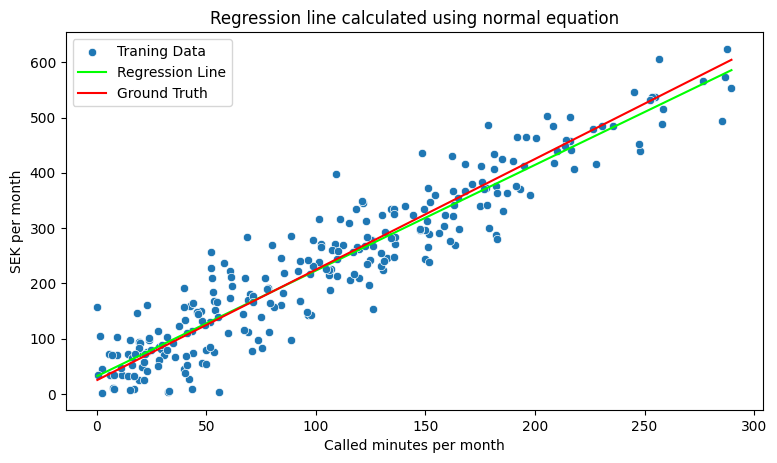

In [341]:
split_data = train_test_split(phone_sub_df)

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(split_data[0], split_data[2])
def y_hat(x): return beta_hat[0] + beta_hat[1]*x

fig, ax = plt.subplots(figsize=[9,5], dpi=100)
sns.scatterplot(x=split_data[0]["x"], y=split_data[2], label="Traning Data")
sns.lineplot(x = split_data[0]["x"], y=y_hat(split_data[0]["x"]), color="lime", label="Regression Line")
sns.lineplot(x = split_data[0]["x"], y = 2 * split_data[0]["x"] + 25, color = "red", label="Ground Truth")
ax.set(xlabel = "Called minutes per month", ylabel = "SEK per month", title = "Regression line calculated using normal equation")
plt.show()


## 3

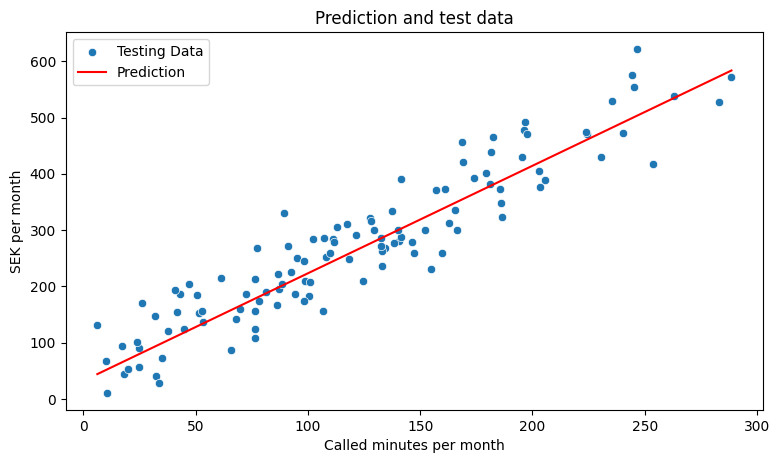

In [342]:
predict = lambda X, weights: X @ weights
y_pred = predict(split_data[1].to_numpy(), beta_hat)

fig, ax = plt.subplots(figsize=[9,5], dpi=100)
sns.scatterplot(x=split_data[1]["x"], y=split_data[3], label="Testing Data")
sns.lineplot(x = split_data[1]["x"], y = y_pred, color = "red", label="Prediction")
ax.set(xlabel = "Called minutes per month", ylabel = "SEK per month", title = "Prediction and test data")
plt.show()


In [350]:
m = len(split_data[3])

MAE = 1/m * np.sum(np.abs(split_data[3]-y_pred))
MSE = 1/m * np.sum(np.abs(split_data[3]-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(40.120026511494814, 2401.5771288679935, 49.00588871623484)

## 4

In [418]:
samples = 10000
np.random.seed(42)
simulated_variables = pd.DataFrame((np.abs(np.random.normal(100, 100, samples)), 
                                    np.random.randint(0, 50, samples),
                                    np.abs(np.random.normal(0, 2, samples)))).T
simulated_variables.columns = ["minutes", "sms", "GB"]
error = np.random.normal(0, 50, samples)
simulated_variables["cost"] = 25 + simulated_variables["minutes"] * 2 + simulated_variables["sms"] * 0.5 + simulated_variables["GB"] * 50 + error


Text(0.5, 0.98, 'Simulated Minutes, Sms, GB and Cost')

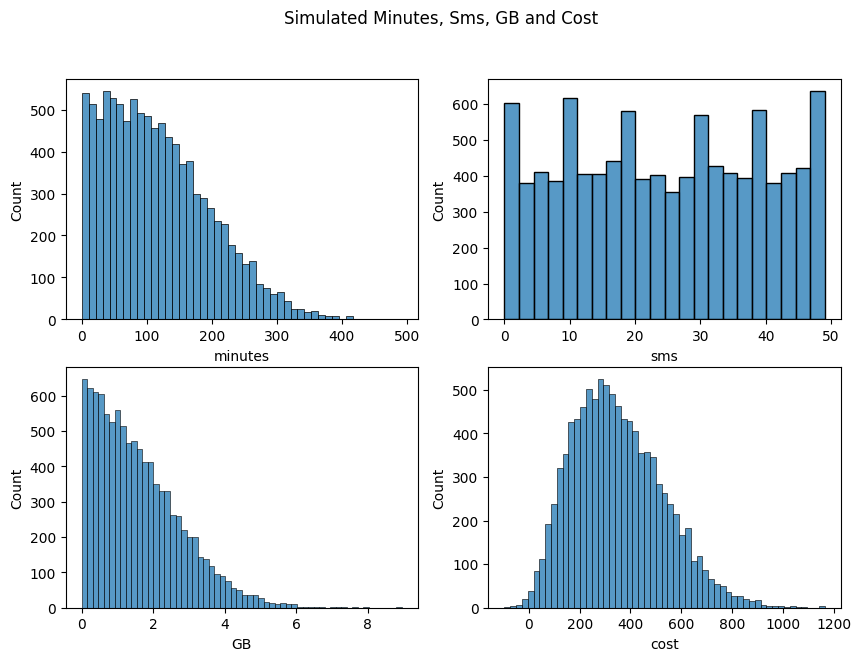

In [419]:
fig, ax = plt.subplots(2, 2, figsize=[10,7], dpi=100)
sns.histplot(data=simulated_variables["minutes"], ax=ax[0,0])
sns.histplot(data=simulated_variables["sms"], ax=ax[0,1])
sns.histplot(data=simulated_variables["GB"], ax=ax[1,0])
sns.histplot(data=simulated_variables["cost"], ax=ax[1,1])
fig.suptitle("Simulated Minutes, Sms, GB and Cost")

In [420]:
simulated_variables = simulated_variables[simulated_variables["GB"] < 4]
simulated_variables = simulated_variables[simulated_variables["minutes"] < 300]
simulated_variables = simulated_variables[simulated_variables["cost"] > 0]
simulated_variables.reset_index(drop = True)

,minutes,sms,GB,cost
0,149.671415,41.0,2.263011,502.396003
1,86.173570,16.0,0.031570,179.072107
2,164.768854,30.0,0.808925,430.008213
3,252.302986,33.0,2.625826,647.244277
4,76.584663,37.0,3.388079,398.016588
...,...,...,...,...
9315,230.110206,36.0,0.611639,473.661741
9316,99.834497,18.0,1.328020,298.342321
9317,29.468328,19.0,2.811456,252.973057
9318,149.576557,31.0,3.439294,536.176482


Text(0.5, 0.98, 'Simulated Minutes, Sms, GB and Cost')

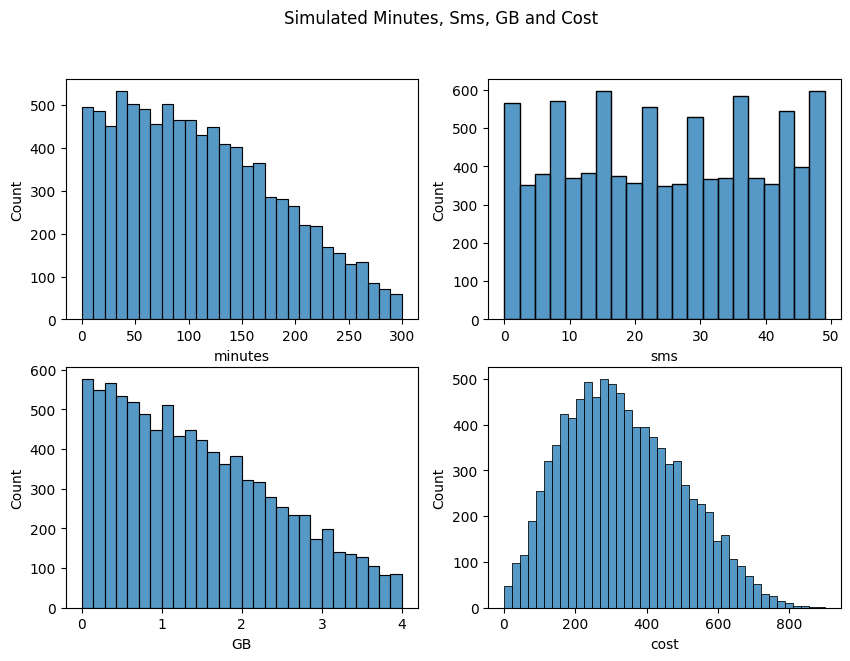

In [421]:
fig, ax = plt.subplots(2, 2, figsize=[10,7], dpi=100)
sns.histplot(data=simulated_variables["minutes"], ax=ax[0,0])
sns.histplot(data=simulated_variables["sms"], ax=ax[0,1])
sns.histplot(data=simulated_variables["GB"], ax=ax[1,0])
sns.histplot(data=simulated_variables["cost"], ax=ax[1,1])
fig.suptitle("Simulated Minutes, Sms, GB and Cost")